# 한국어 형태소 분석 및 데이터 시각화

이 노트북은 Bareun API를 사용하여 한국어 텍스트 데이터에서 명사를 추출하고, 다양한 시각화 기법을 통해 분석하는 방법을 설명합니다.

## 주요 기능
1. Bareun API를 사용한 한국어 형태소 분석
2. 뉴스 데이터에서 명사 추출
3. 워드클라우드, 네트워크 분석, 막대 차트를 통한 시각화

In [1]:
# Bareun API 패키지 다운로드
# curl 명령을 사용해 Bareun Linux 패키지를 다운로드
# -L: 리다이렉션을 따름, -J: Content-Disposition 헤더 존재 시 파일명 사용, -k: SSL 인증 검증 무시, -s: 진행 상황 표시 없음
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb

# 현재 디렉토리의 파일 목록 표시
!ls

bareun-linux.deb  sample_data


In [2]:
# 시스템 정보 출력
# uname -a: 운영체제 이름, 호스트명, 커널 버전 등의 시스템 정보 출력
!uname -a

Linux 2b5e5ae00c77 6.1.123+ #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


In [3]:
# 다운로드한 Bareun 패키지 설치
# dpkg -i: 데비안 패키지 설치
!dpkg -i bareun-linux.deb

Selecting previously unselected package bareun.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (3.0.rc2) ...
Setting up bareun (3.0.rc2) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Configuration file /etc/systemd/system/bareun.service is marked executable. Please remove executable permission bits. Proceeding anyway.
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.


In [4]:
# Bareun 환경 변수 설정
# %env: Jupyter 매직 명령어로 환경 변수 설정
%env BAREUN_ROOT="/opt/bareun"  # Bareun 설치 루트 경로 설정
%env LD_LIBRARY_PATH="/opt/bareun/lib"  # 라이브러리 경로 설정

# Bareun 서비스 백그라운드로 실행
# nohup: 로그아웃 후에도 명령이 계속 실행되도록 함
# &: 명령을 백그라운드로 실행
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

env: BAREUN_ROOT="/opt/bareun"  # Bareun 설치 루트 경로 설정
env: LD_LIBRARY_PATH="/opt/bareun/lib"  # 라이브러리 경로 설정
nohup: appending output to 'nohup.out'


In [5]:
# Bareun 프로세스 실행 확인
# ps -ef: 모든 프로세스 상세 정보 출력
# grep bareun: bareun 문자열이 포함된 라인만 필터링
!ps -ef | grep bareun

root        1153       1 69 12:26 ?        00:00:01 /opt/bareun/bin/bareun
root        1173     391  0 12:26 ?        00:00:00 /bin/bash -c ps -ef | grep bareun
root        1175    1173  0 12:26 ?        00:00:00 grep bareun


In [15]:
# API 키 등록
# -reg 옵션: API 키 등록
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-YEVHS7Q-VDSUWIY-XCIS3OQ-LWD7WHA

2025-05-28 12:27:46.599780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/bareun/lib
2025-05-28 12:27:46.599875: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Use config file: /opt/bareun/config/bareun.json

------
200 OK
sucessfully registered koba-YEVHS7Q-VDSUWIY-XCIS3OQ-LWD7WHA


In [7]:
# Bareun Python 패키지(bareunpy) 설치 또는 업데이트
# -U: 이미 설치된 패키지를 최신 버전으로 업그레이드
!pip install -U bareunpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.


In [22]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126183 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
# 필요한 라이브러리 임포트
import sys  # 시스템 관련 함수 및 변수 제공
import google.protobuf.text_format as tf  # 프로토콜 버퍼 텍스트 포맷 처리
from bareunpy import Tagger  # 형태소 분석기
from bareunpy import Tokenizer  # 토크나이저
from collections import defaultdict  # 기본값이 있는 딕셔너리

# Bareun API 초기화
API_KEY="koba-YEVHS7Q-VDSUWIY-XCIS3OQ-LWD7WHA"  # API 키 설정
tagger = Tagger(API_KEY, 'localhost', 5656)  # 형태소 분석기 객체 생성 (localhost:5656 서버에 연결)
tokenizer = Tokenizer(API_KEY, 'localhost', 5656)  # 토크나이저 객체 생성

In [2]:
# pandas 라이브러리 임포트 (데이터 처리)
import pandas as pd

# Excel 파일 불러오기
file_path = '교권_news.xlsx'  # 분석할 Excel 파일 경로

# DataFrame으로 Excel 파일 로드
# sheet_name=0: 첫 번째 시트 선택
df = pd.read_excel(file_path, sheet_name=0)

# 데이터 미리보기 출력
print("Excel file loaded successfully. Preview:")  # 성공 메시지
print(df.head())  # 처음 5개 행 출력

# 데이터프레임 기본 정보 출력
print("\nDataFrame info:")
print(f"Shape: {df.shape}")  # 행과 열의 수 (shape)
print(f"Columns: {df.columns.tolist()}")  # 컬럼명 목록

Excel file loaded successfully. Preview:
                                           제목  \
0      [대선공약] 李 "국가책임 공교육" vs 金 "AI교과서 전면 도입"   
1   교장, 교감 승진 꺼리고 명퇴고려하는 대구 교사들, “책임감 부담스러...   
2  [달그락달그락] "대통령 후보들의 청소년 공약, 누가 진짜 우리를 생각...   
3                  교권침해 난동 또 난동… 두 번 우는 피해 교사   
4            교사 또 떠났는데도… "교권은 여전히 무방비" 교육계 분노   

                                                  본문  
0  후보들은 교권과 학교 안전을 보장하기 위한 제도를 만들겠다고 앞다퉈 공약했다. 올해...  
1  교권이 추락하는 상황에서 교내 최종 결정권자와 책임자로서 역할은 늘어나는 동시에 그...  
2  학습권 교권의 조화 - 행정업무 부담 완화로 아이들의 학습권 강화 - 학생 지도 전...  
3  학교가 교권보호위원회(교보위) 개최를 위한 의견서 제출을 요구하자 학부모가 또다시 ...  
4  교권 회복과 학교 정상화를 향한 절박한 외침이 28일 오후 경남교육청 본관 앞을 울...  

DataFrame info:
Shape: (100, 2)
Columns: ['제목', '본문']


In [3]:
# 필요한 라이브러리 임포트
import re  # 정규 표현식
from tqdm import tqdm  # 진행 상황 표시 바
from collections import Counter  # 요소 개수 세기
import pandas as pd  # 데이터 처리

# 제목에서 명사 추출 함수
def extract_title_nouns(df, tagger):
    """제목에서 명사 추출"""
    # 결과 저장할 열 초기화
    df['제목_명사'] = None

    # 모든 행 순회하며 처리 (진행 상황 표시)
    for i in tqdm(range(len(df))):
        # 제목 텍스트 가져오기 (NaN 값 처리)
        text = str(df['제목'].iloc[i]) if not pd.isna(df['제목'].iloc[i]) else ""
        # Bareun API로 명사 추출
        nouns = tagger.tags([text]).nouns()
        # 한 글자 명사 제거 (의미 없는 단어 필터링)
        nouns = [noun for noun in nouns if len(noun) > 1]
        # 결과를 데이터프레임에 저장
        df.at[i, '제목_명사'] = nouns

    return df  # 처리된 데이터프레임 반환

# 본문에서 명사 추출 함수
def extract_content_nouns(df, tagger):
    """본문에서 명사 추출"""
    # 결과 저장할 열 초기화
    df['본문_명사'] = None

    # 모든 행 순회하며 처리 (진행 상황 표시)
    for i in tqdm(range(len(df))):
        # 본문 텍스트 가져오기 (NaN 값 처리)
        text = str(df['본문'].iloc[i]) if not pd.isna(df['본문'].iloc[i]) else ""
        # Bareun API로 명사 추출
        nouns = tagger.tags([text]).nouns()
        # 한 글자 명사 제거 (의미 없는 단어 필터링)
        nouns = [noun for noun in nouns if len(noun) > 1]
        # 결과를 데이터프레임에 저장
        df.at[i, '본문_명사'] = nouns

    return df  # 처리된 데이터프레임 반환

# 명사 결합 및 빈도 계산 함수
def combine_nouns(df):
    """제목과 본문 명사 결합 및 빈도 계산"""
    # 결과 저장할 열 초기화
    df['전체_명사'] = None  # 제목과 본문의 명사를 합친 리스트
    df['명사_빈도'] = None  # 각 문서별 명사 빈도 딕셔너리

    # 전체 명사를 모을 리스트
    all_nouns = []

    # 모든 행 순회하며 처리
    for i in range(len(df)):
        # 제목과 본문의 명사 가져오기 (None 처리)
        title_nouns = df['제목_명사'].iloc[i] or []
        content_nouns = df['본문_명사'].iloc[i] or []

        # 제목과 본문의 명사 결합
        combined = title_nouns + content_nouns
        # 결합한 명사 리스트 저장
        df.at[i, '전체_명사'] = combined
        # 명사 빈도 계산하여 딕셔너리로 저장
        df.at[i, '명사_빈도'] = dict(Counter(combined))

        # 전체 명사 수집
        all_nouns.extend(combined)

    # 전체 문서의 명사 빈도 계산하여 데이터프레임 속성에 저장
    df.attrs['전체_명사_빈도'] = dict(Counter(all_nouns))

    return df  # 처리된 데이터프레임 반환

In [4]:
# 명사 추출 함수 실행

# 1. 제목에서 명사 추출
df = extract_title_nouns(df, tagger)  # 제목에서 명사 추출하여 '제목_명사' 열에 저장

# 2. 본문에서 명사 추출
df = extract_content_nouns(df, tagger)  # 본문에서 명사 추출하여 '본문_명사' 열에 저장

# 3. 제목과 본문의 명사 결합 및 빈도 계산
processed_df = combine_nouns(df)  # 명사 결합하여 '전체_명사'와 '명사_빈도' 열에 저장

# 처리 결과 요약 출력
print("처리 완료!")  # 작업 완료 메시지
print(f"행 수: {len(processed_df)}")  # 전체 행(문서) 수 출력
print(f"컬럼: {processed_df.columns.tolist()}")  # 전체 열(컬럼) 목록 출력

100%|██████████| 100/100 [00:14<00:00,  6.79it/s]

처리 완료!
행 수: 100
컬럼: ['제목', '본문', '제목_명사', '본문_명사', '전체_명사', '명사_빈도']


In [5]:
# 명사 추출 결과 확인

# 제목 명사 추출 결과 출력
print("== 제목 명사 예시 ==")
for i in range(3):  # 처음 3개 문서에 대해서만 출력
    print(f"\n[문서 {i+1}]")  # 문서 번호 (1부터 시작)
    print(f"제목: {processed_df['제목'].iloc[i]}")  # 원본 제목 출력
    print(f"추출된 명사: {processed_df['제목_명사'].iloc[i]}")  # 추출된 명사 목록 출력

# 본문 명사 추출 결과 출력
print("\n== 본문 명사 예시 ==")
for i in range(3):  # 처음 3개 문서에 대해서만 출력
    print(f"\n[문서 {i+1}]")  # 문서 번호 (1부터 시작)
    print(f"본문 일부: {str(processed_df['본문'].iloc[i])[:50]}...")  # 본문 앞부분만 출력
    # 추출된 명사 중 앞부분 10개만 출력 (None이면 빈 리스트)
    print(f"추출된 명사(일부): {processed_df['본문_명사'].iloc[i][:10] if processed_df['본문_명사'].iloc[i] else []}")

# 상위 빈출 명사 확인
print("\n== 상위 빈출 명사 ==")
for i in range(3):  # 처음 3개 문서에 대해서만 출력
    print(f"\n[문서 {i+1}]")  # 문서 번호 (1부터 시작)
    freq = processed_df['명사_빈도'].iloc[i]  # i번째 문서의 명사 빈도 딕셔너리
    if freq:  # 빈도 정보가 있는 경우
        # 빈도 기준으로 내림차순 정렬하여 상위 5개만 출력
        sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"상위 5개 명사: {sorted_freq}")
    else:  # 빈도 정보가 없는 경우
        print("빈도 정보 없음")

== 제목 명사 예시 ==

[문서 1]
제목: [대선공약] 李 "국가책임 공교육" vs 金 "AI교과서 전면 도입"
추출된 명사: ['대선', '공약', '국가', '책임', '공교육', '교과서', '전면', '도입']

[문서 2]
제목: 교장, 교감 승진 꺼리고 명퇴고려하는 대구 교사들, “책임감 부담스러...
추출된 명사: ['교장', '교감', '승진', '명퇴', '고려', '대구', '교사', '책임감']

[문서 3]
제목: [달그락달그락] "대통령 후보들의 청소년 공약, 누가 진짜 우리를 생각...
추출된 명사: ['그락달그', '대통령', '후보', '청소년', '공약', '진짜', '우리', '생각']

== 본문 명사 예시 ==

[문서 1]
본문 일부: 후보들은 교권과 학교 안전을 보장하기 위한 제도를 만들겠다고 앞다퉈 공약했다. 올해 대전 ...
추출된 명사(일부): ['후보', '교권', '학교', '안전', '제도', '올해', '대전', '초등학생', '피살', '서울']

[문서 2]
본문 일부: 교권이 추락하는 상황에서 교내 최종 결정권자와 책임자로서 역할은 늘어나는 동시에 그만큼 책...
추출된 명사(일부): ['교권', '상황', '교내', '최종', '결정권자', '책임자', '역할', '동시', '책임', '이유']

[문서 3]
본문 일부: 학습권 교권의 조화 - 행정업무 부담 완화로 아이들의 학습권 강화 - 학생 지도 전념 교육...
추출된 명사(일부): ['학습', '교권', '조화', '행정', '업무', '부담', '완화', '아이들', '학습', '강화']

== 상위 빈출 명사 ==

[문서 1]
상위 5개 명사: [('교권', 2), ('학교', 2), ('안전', 2), ('교사', 2), ('대선', 1)]

[문서 2]
상위 5개 명사: [('교감', 2), ('승진', 2), ('교권', 2), ('교내', 2), ('역할', 2)]

[문서 3]
상위 5개 명사: [('교육', 3), ('학습'

In [6]:
# 모든 명사 추출 결과를 하나의 리스트로 모으기
all_nouns_combined = []  # 모든 명사를 저장할 빈 리스트 생성

# 모든 문서의 제목과 본문 명사를 하나의 리스트로 모음
for i in range(len(processed_df)):
    # 제목 명사 추가 (None 체크)
    if processed_df['제목_명사'].iloc[i]:
        all_nouns_combined.extend(processed_df['제목_명사'].iloc[i])  # 리스트 확장

    # 본문 명사 추가 (None 체크)
    if processed_df['본문_명사'].iloc[i]:
        all_nouns_combined.extend(processed_df['본문_명사'].iloc[i])  # 리스트 확장

# 전체 명사 개수 확인 및 출력
print(f"총 명사 개수: {len(all_nouns_combined)}")  # 중복 포함 개수

# 가장 많이 등장한 명사 Top 20 확인
from collections import Counter  # 빈도 계산을 위한 Counter 클래스
noun_counter = Counter(all_nouns_combined)  # 명사 빈도 계산
top_nouns = noun_counter.most_common(20)  # 상위 20개 추출

# 상위 20개 명사 및 등장 횟수 출력
print("\n가장 많이 등장한 명사 Top 20:")
for noun, count in top_nouns:
    print(f"{noun}: {count}회")

# 전체 명사 목록을 파일로 저장 (선택)
save_to_file = False  # 파일 저장 여부 (False: 저장 안 함)
if save_to_file:  # 파일로 저장하는 경우
    with open('all_nouns.txt', 'w', encoding='utf-8') as f:  # UTF-8 인코딩으로 파일 열기
        for noun in sorted(set(all_nouns_combined)):  # 중복 제거 후 정렬
            f.write(f"{noun}\n")  # 각 명사를 한 줄에 하나씩 저장
    print("\n모든 고유 명사를 'all_nouns.txt' 파일에 저장했습니다.")

# 중복 제거된 고유 명사 목록 생성
all_unique_nouns = sorted(set(all_nouns_combined))  # 중복 제거 후 알파벳순 정렬
print(f"\n고유 명사 개수: {len(all_unique_nouns)}")  # 중복 제거된 명사 개수 출력

총 명사 개수: 2725

가장 많이 등장한 명사 Top 20:
교사: 178회
교권: 162회
보호: 100회
제주: 85회
학생: 83회
민원: 62회
경찰: 55회
위원회: 53회
사건: 53회
교육: 50회
침해: 43회
학교: 41회
폭행: 41회
학부모: 35회
해당: 35회
중학교: 32회
징계: 29회
수사: 29회
여부: 27회
교육청: 26회

고유 명사 개수: 581


<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-7-a0b9823f4d7a>:49: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) mis

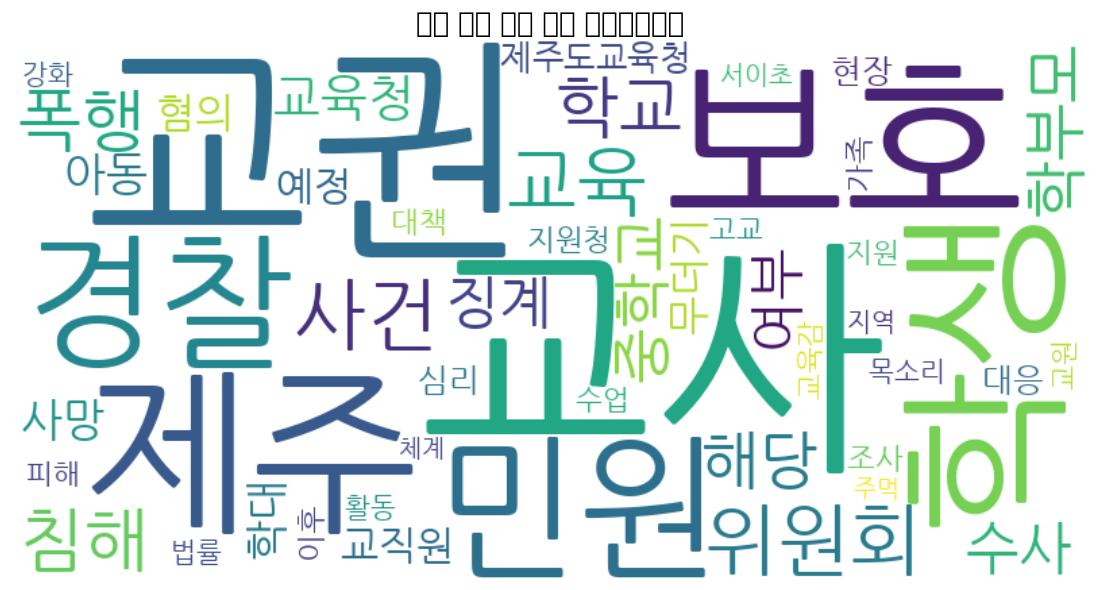

총 581개의 단어 중 상위 50개를 시각화했습니다.


In [7]:
# 워드클라우드 시각화 함수
import matplotlib.pyplot as plt  # 그래프 생성
from wordcloud import WordCloud  # 워드클라우드 생성
import matplotlib.font_manager as fm  # 폰트 관리

def visualize_wordcloud(word_freq, title='워드클라우드', width=800, height=400, max_words=100):
    """
    단어 빈도수를 워드클라우드로 시각화하는 함수

    Parameters:
    ----------
    word_freq : dict
        단어와, 해당 단어의 빈도수를 가진 딕셔너리 (예: {'단어': 빈도수})
    title : str, default='워드클라우드'
        그래프 제목
    width : int, default=800
        워드클라우드 이미지 너비
    height : int, default=400
        워드클라우드 이미지 높이
    max_words : int, default=100
        표시할 최대 단어 수
    """
    # 한글 폰트 설정 (나눔고딕 또는 시스템에 설치된 한글 폰트)
    font_path = None
    for font in fm.findSystemFonts():  # 시스템의 모든 폰트 검색
        if 'NanumGothic' in font or 'NanumBarunGothic' in font:  # 나눔고딕 계열 폰트 찾기
            font_path = font
            break

    # 한글 폰트를 찾지 못한 경우 경고 메시지 출력
    if not font_path:
        print("경고: 한글 폰트를 찾을 수 없습니다. 시스템에 한글 폰트를 설치하세요.")

    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path=font_path,  # 한글 폰트 경로
        width=width, height=height,  # 이미지 크기
        background_color='white',  # 배경색
        max_words=max_words,  # 최대 표시 단어 수
        prefer_horizontal=0.9,  # 가로로 표시될 확률
        relative_scaling=0.5  # 단어 크기 상대 비율
    ).generate_from_frequencies(word_freq)  # 빈도 기반으로 생성

    # 시각화
    plt.figure(figsize=(12, 6))  # 그림 크기 설정
    plt.imshow(wordcloud, interpolation='bilinear')  # 워드클라우드 이미지 표시
    plt.axis('off')  # 축 제거
    plt.title(title, fontsize=20)  # 제목 설정
    plt.tight_layout()  # 레이아웃 조정
    plt.show()  # 그림 표시

    # 결과 메시지 출력
    print(f"총 {len(word_freq)}개의 단어 중 상위 {max_words}개를 시각화했습니다.")

    return wordcloud  # 생성된 워드클라우드 객체 반환

# 사용 예시:
# 전체 명사 빈도로 워드클라우드 만들기
if 'noun_counter' in locals():  # noun_counter 변수가 존재하는 경우
    visualize_wordcloud(dict(noun_counter), title='전체 문서 단어 빈도 워드클라우드', max_words=50)  # 상위 50개 단어로 워드클라우드 생성

<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-10-0473e6185fbc>:88: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN

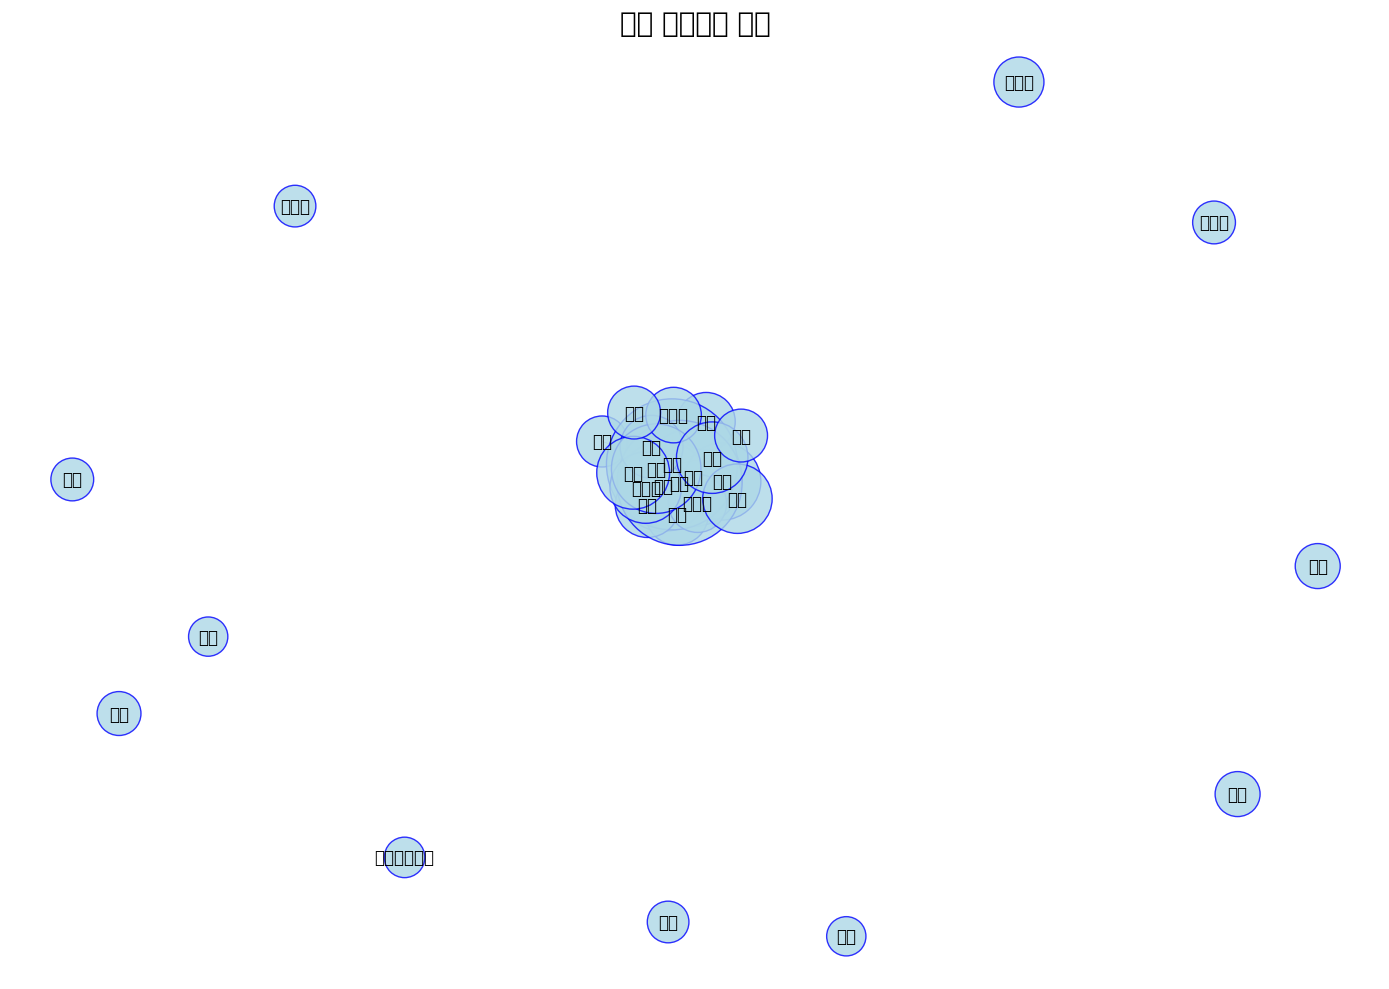

총 30개의 단어와 45개의 연결을 시각화했습니다.


In [10]:
# 소셜 네트워크 분석 시각화 함수
import networkx as nx  # 네트워크 분석 및 시각화
from collections import Counter, defaultdict  # 빈도 계산 및 기본값 딕셔너리

from matplotlib.font_manager import FontProperties

# 한글 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # Colab에 설치한 폰트
font_prop = FontProperties(fname=font_path)


def visualize_word_network(texts, title='단어 네트워크', min_count=3, max_words=100, threshold=0.2):
    """
    단어 네트워크를 시각화하는 함수

    Parameters:
    ----------
    texts : list of list
        단어 리스트의 리스트 (각 문서에 대한 단어 리스트)
    title : str, default='단어 네트워크'
        그래프 제목
    min_count : int, default=3
        단어의 최소 등장 횟수
    max_words : int, default=100
        표시할 최대 단어 수
    threshold : float, default=0.2
        동시 출현 단어 쌍의 최소 비율
    """
    # 전체 단어 빈도 계산
    word_count = Counter()  # 빈 Counter 객체 생성
    for doc_words in texts:  # 각 문서의 단어 리스트에 대해
        word_count.update(doc_words)  # 단어 빈도 누적 계산

    # 최소 빈도 이상인 단어만 선택
    common_words = {word for word, count in word_count.items() if count >= min_count}  # 최소 빈도 이상인 단어 집합

    # 상위 단어 선택
    top_words = set(dict(word_count.most_common(max_words)).keys())  # 빈도 기준 상위 단어 집합
    selected_words = common_words.intersection(top_words)  # 두 조건을 모두 만족하는 단어만 선택

    # 동시 출현 빈도 계산
    co_occurrence = defaultdict(int)  # 동시 출현 빈도를 저장할 딕셔너리
    for doc_words in texts:  # 각 문서의 단어 리스트에 대해
        # 문서 내의 선택된 단어들만 필터링
        doc_selected = [word for word in doc_words if word in selected_words]

        # 모든 가능한 단어 쌍에 대해 동시 출현 횟수 계산
        for i in range(len(doc_selected)):
            for j in range(i+1, len(doc_selected)):  # 중복 계산 방지
                word_pair = tuple(sorted([doc_selected[i], doc_selected[j]]))  # 단어 쌍 정렬(정규화)
                co_occurrence[word_pair] += 1  # 동시 출현 횟수 증가

    # 그래프 생성
    G = nx.Graph()  # 빈 그래프 생성

    # 노드 추가 (단어)
    for word in selected_words:  # 선택된 각 단어에 대해
        G.add_node(word, weight=word_count[word])  # 노드 추가 (단어 빈도를 가중치로)

    # 엣지 추가 (동시 출현)
    max_weight = max(co_occurrence.values()) if co_occurrence else 1  # 최대 동시 출현 빈도
    for (word1, word2), weight in co_occurrence.items():  # 각 단어 쌍과 동시 출현 빈도에 대해
        # 일정 비율 이상인 엣지만 추가
        if weight / max_weight >= threshold:  # 임계값 이상인 경우만
            G.add_edge(word1, word2, weight=weight)  # 엣지 추가 (동시 출현 빈도를 가중치로)

    # 그래프 시각화
    plt.figure(figsize=(14, 10))  # 그림 크기 설정

    # 노드 크기와 엣지 너비 계산
    node_size = [G.nodes[node]['weight'] * 50 for node in G.nodes]  # 노드 크기는 단어 빈도에 비례
    edge_width = [G.edges[edge]['weight'] / max_weight * 2 for edge in G.edges]  # 엣지 너비는 동시 출현 빈도에 비례

    # 레이아웃 설정 (노드 위치 계산)
    pos = nx.spring_layout(G, k=0.4, iterations=30)  # k: 노드 간 거리, iterations: 반복 횟수

    # 그래프 그리기
    nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.8,  # 노드 그리기
                          node_color='lightblue', edgecolors='blue')
    nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.5, edge_color='gray')  # 엣지 그리기

    # 레이블 그리기 - 수정된 부분
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_prop.get_name())  # 한글 폰트 적용

    # 그래프 설정 및 표시
    plt.title(title, fontsize=20)  # 제목 설정
    plt.axis('off')  # 축 제거
    plt.tight_layout()  # 레이아웃 조정
    plt.show()  # 그림 표시

    # 결과 메시지 출력
    print(f"총 {len(G.nodes)}개의 단어와 {len(G.edges)}개의 연결을 시각화했습니다.")

    return G  # 생성된 그래프 객체 반환

# 사용 예시:
# 전체 문서의 단어 리스트 수집
if 'processed_df' in locals():  # processed_df 변수가 존재하는 경우
    # 전체 명사 리스트 수집
    all_doc_words = processed_df['전체_명사'].tolist()  # 각 문서의 전체 명사 리스트
    # 단어 네트워크 생성 및 시각화
    visualize_word_network(all_doc_words, title='단어 네트워크 분석', min_count=5, max_words=30)

In [11]:
# 단어 빈도 차트 시각화 함수
import plotly.express as px  # 인터랙티브 시각화
import pandas as pd  # 데이터 처리

def visualize_word_frequency(word_freq, title='단어 빈도 차트', top_n=20, horizontal=True):
    """
    단어 빈도를 막대 차트로 시각화하는 함수

    Parameters:
    ----------
    word_freq : dict
        단어와, 해당 단어의 빈도수를 가진 딕셔너리 (예: {'단어': 빈도수})
    title : str, default='단어 빈도 차트'
        그래프 제목
    top_n : int, default=20
        표시할 상위 단어 수
    horizontal : bool, default=True
        가로 막대 그래프 여부 (False면 세로 막대 그래프)
    """
    # 상위 단어 추출
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]  # 빈도순 정렬 후 상위 n개
    words, counts = zip(*top_words)  # 단어와 빈도 분리

    # 데이터프레임 생성
    df = pd.DataFrame({'단어': words, '빈도': counts})  # 단어와 빈도로 DataFrame 생성

    # 시각화 방향 설정
    if horizontal:  # 가로 막대 그래프인 경우
        # 가로 막대 그래프 (상위 단어가 위에 오도록)
        df = df.iloc[::-1]  # 역순으로 정렬 (상위 단어가 위에 오도록)
        fig = px.bar(df, x='빈도', y='단어',  # x축은 빈도, y축은 단어
                   title=f'{title} (상위 {top_n}개)',  # 제목 설정
                   color='빈도',  # 색상은 빈도에 따라
                   color_continuous_scale='viridis')  # 색상 스케일 설정
    else:  # 세로 막대 그래프인 경우
        # 세로 막대 그래프
        fig = px.bar(df, x='단어', y='빈도',  # x축은 단어, y축은 빈도
                   title=f'{title} (상위 {top_n}개)',  # 제목 설정
                   color='빈도',  # 색상은 빈도에 따라
                   color_continuous_scale='viridis')  # 색상 스케일 설정

    # 그래프 레이아웃 설정
    fig.update_layout(
        autosize=False,  # 자동 크기 조절 비활성화
        width=900,  # 너비 설정
        height=500,  # 높이 설정
        xaxis_tickangle=-45 if not horizontal else 0,  # 세로 막대 그래프일 때는 x축 레이블 45도 회전
    )

    # 그래프 표시
    fig.show()  # 인터랙티브 그래프 표시
    print(f"상위 {top_n}개 단어의 빈도를 시각화했습니다.")  # 결과 메시지

    return fig  # 생성된 그래프 객체 반환

# 사용 예시:
# 전체 명사 빈도로 차트 만들기
if 'noun_counter' in locals():  # noun_counter 변수가 존재하는 경우
    visualize_word_frequency(dict(noun_counter), title='전체 문서 단어 빈도', top_n=20)  # 상위 20개 단어 빈도 차트 생성

상위 20개 단어의 빈도를 시각화했습니다.
